In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(image):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.imshow(image,cmap='gray')

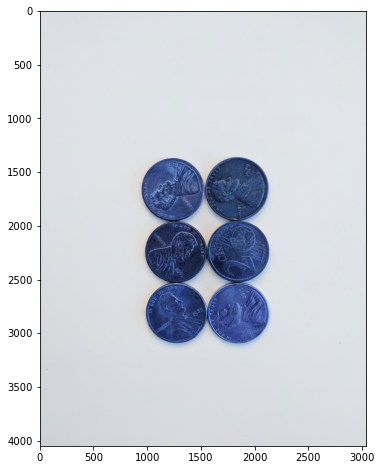

In [3]:
sep_coins = cv2.imread('../DATA/pennies.jpg')
display(sep_coins);

In [4]:
sep_coins.shape

(4048, 3036, 3)

In [5]:
# STEPS FOR PERFORMING SEGMENTATION OF COINS
# GRAYSCALE
# MEDIAN BLUR
# BINARY THRESHOLD
# FIND CONTOURS
gray_sep_coins = cv2.cvtColor(sep_coins,cv2.COLOR_BGR2GRAY)

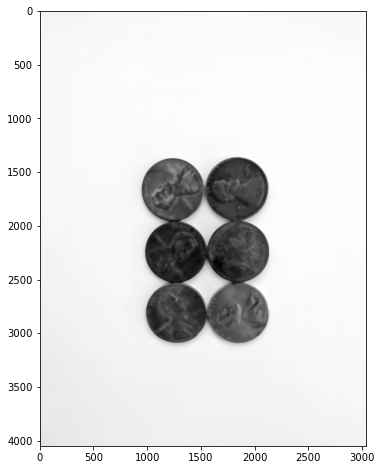

In [6]:
gray_sep_blur = cv2.medianBlur(gray_sep_coins,25)
display(gray_sep_blur);

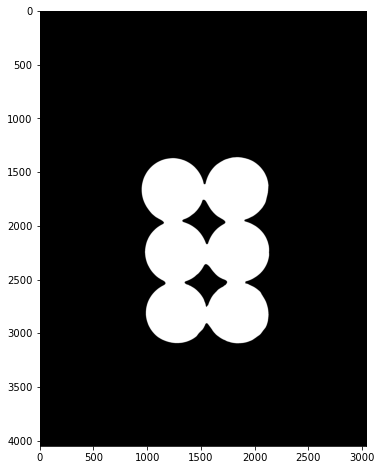

In [7]:
ret, sep_coins_thresh = cv2.threshold(gray_sep_blur,160,255,cv2.THRESH_BINARY_INV)
display(sep_coins_thresh);

In [8]:
contours, hierarchy = cv2.findContours(sep_coins_thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [9]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

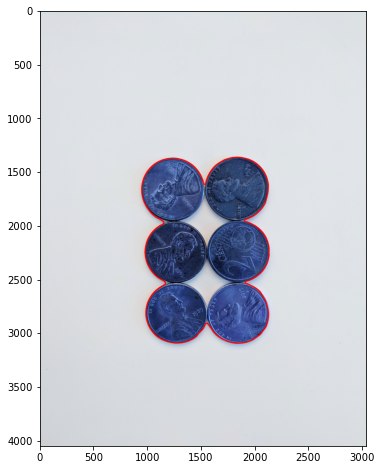

In [10]:
display(sep_coins);

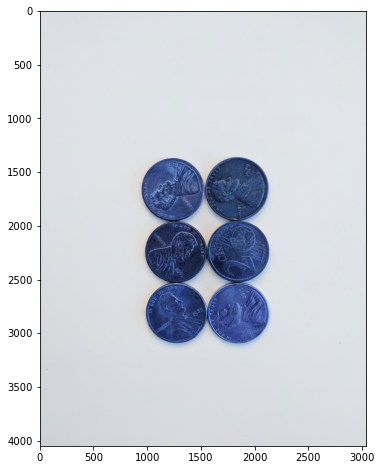

In [11]:
img = cv2.imread('../DATA/pennies.jpg')
display(img);

In [12]:
img.shape

(4048, 3036, 3)

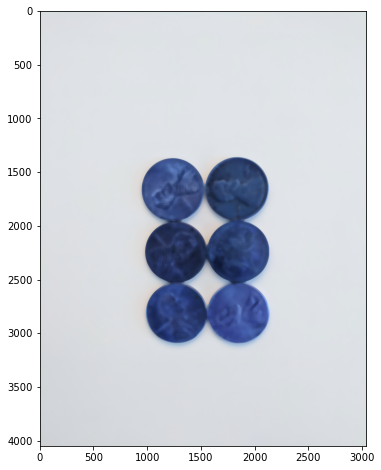

In [13]:
# MEDIAN BLUR
blurred_img = cv2.medianBlur(img,35)
display(blurred_img);

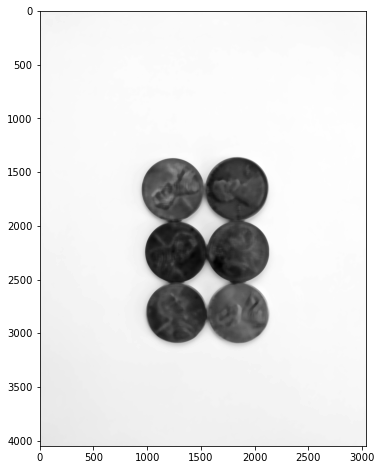

In [14]:
# GRAYSCALE
gray = cv2.cvtColor(blurred_img,cv2.COLOR_BGR2GRAY)
display(gray);

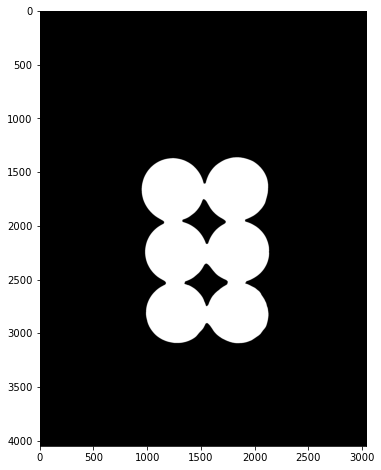

In [15]:
# BINARY THRESHOLD
ret, thresh = cv2.threshold(gray,160,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh);

In [16]:
kernel = np.ones((3,3),np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

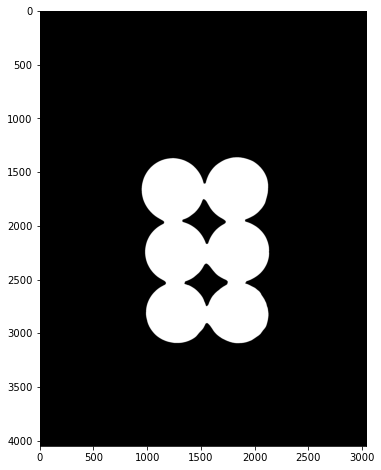

In [17]:
# NOISE REMOVAL (OPTIONAL BUT GOOD TO DO)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening);

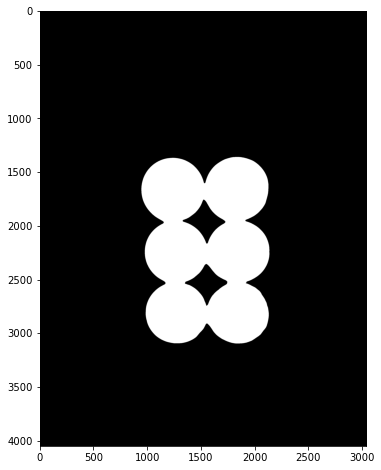

In [18]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
display(sure_bg);

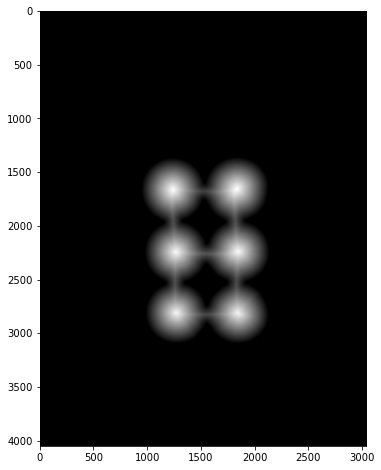

In [19]:
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,5)
display(dist_transform);

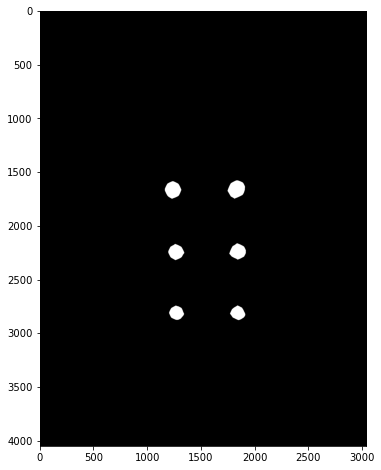

In [20]:
ret, thresh = cv2.threshold(dist_transform,0.75*dist_transform.max(),255,0)
display(thresh);

In [21]:
thresh = np.uint8(thresh)

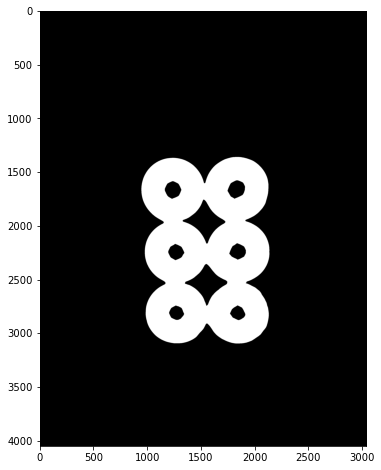

In [22]:
remaining = cv2.subtract(sure_bg,thresh)
display(remaining);

In [23]:
ret, labels = cv2.connectedComponents(thresh)

In [24]:
labels += 1
labels

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [25]:
labels[remaining==255] = 0 

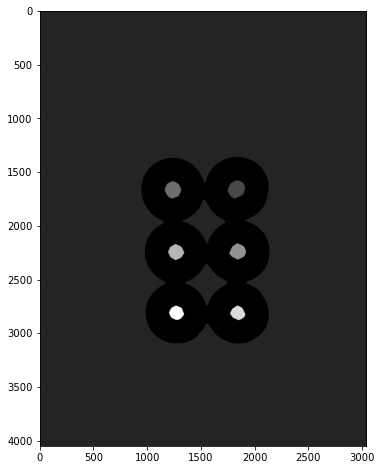

In [26]:
display(labels);

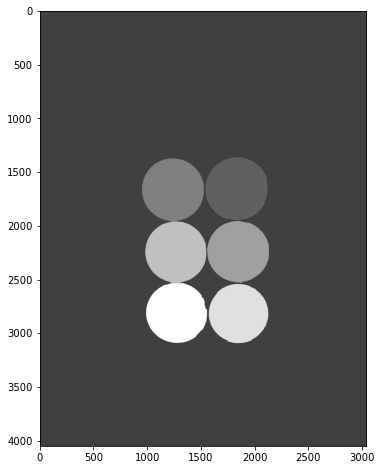

In [27]:
labels = cv2.watershed(img,labels)
display(labels);

In [28]:
contours, hierarchy = cv2.findContours(labels,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [29]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),10)

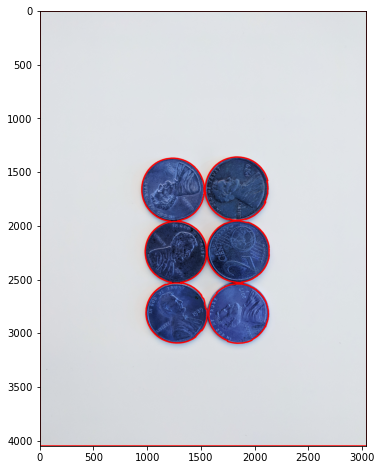

In [30]:
display(img);